<a href="https://colab.research.google.com/github/imambucse3/BU/blob/master/irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
print("helllo world")

helllo world


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [0]:
import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library 

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
iris_class      150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
dataset.head(150)#change head with sample and tail

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


In [12]:
#one hot encoding
y=pd.get_dummies(y)
y.sample(150)

,Iris-setosa,Iris-versicolor,Iris-virginica
48,1,0,0
8,1,0,0
129,0,0,1
30,1,0,0
39,1,0,0
...,...,...,...
15,1,0,0
66,0,1,0
145,0,0,1
18,1,0,0


In [15]:
#Selective import Scikit Learn 
from sklearn.model_selection import train_test_split

# Generate Training and Validation Sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=40) #0.3 data as data test

#converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(110, 4) (110, 3)
(40, 4) (40, 3)


In [21]:
#Importing our model
from sklearn.neural_network import MLPClassifier

#model initialization
Model = MLPClassifier(hidden_layer_sizes=(9,6), max_iter=2000, alpha=0.01, #try change hidden layer
                     solver='sgd', verbose=1,  random_state=121) #try verbode=0 to train with out logging
#train our model
h=Model.fit(x_train,y_train)
#use our model to predict
y_pred=Model.predict(x_test)

Iteration 1, loss = 3.43178920
Iteration 2, loss = 3.37330179
Iteration 3, loss = 3.29470318
Iteration 4, loss = 3.20311782
Iteration 5, loss = 3.10288744
Iteration 6, loss = 2.99866879
Iteration 7, loss = 2.89514708
Iteration 8, loss = 2.79390409
Iteration 9, loss = 2.69586118
Iteration 10, loss = 2.60287909
Iteration 11, loss = 2.51596335
Iteration 12, loss = 2.43532364
Iteration 13, loss = 2.36403962
Iteration 14, loss = 2.30252760
Iteration 15, loss = 2.25193593
Iteration 16, loss = 2.20857144
Iteration 17, loss = 2.17201289
Iteration 18, loss = 2.14055106
Iteration 19, loss = 2.11228041
Iteration 20, loss = 2.08635467
Iteration 21, loss = 2.06236928
Iteration 22, loss = 2.03985392
Iteration 23, loss = 2.01872180
Iteration 24, loss = 1.99910430
Iteration 25, loss = 1.98070200
Iteration 26, loss = 1.96326707
Iteration 27, loss = 1.94682383
Iteration 28, loss = 1.93135127
Iteration 29, loss = 1.91678281
Iteration 30, loss = 1.90301188
Iteration 31, loss = 1.88978412
Iteration 32, los

In [22]:
#scikit for machine learning reporting
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred)) # Print summary report
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Print Confusion matrix 
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

   micro avg       0.97      0.97      0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40
 samples avg       0.97      0.97      0.97        40

[[13  0  0]
 [ 0 15  1]
 [ 0  0 11]]
accuracy is  0.975


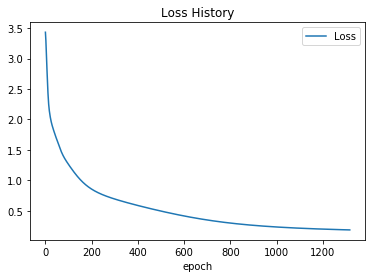

In [23]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])